# Lab 2 - Computação Simbólica em Python
Neste notebook veremos como utilizar recursos de computação algébrica, com expressões analíticas, dentro do ambiente Jupyter notebook. Para isso, usaremos a biblioteca [SymPy](https://www.sympy.org/pt/index.html). A intenção aqui é fornecer uma introdução básica ao tema, concentrando-se em como usar esses recursos no contexto do nosso curso. Para mais informações, você pode consultar a excelente [documentação](https://docs.sympy.org/latest/index.html) do **SymPy** que está disponível online. Um bom ponto de partida é o [Tutorial do SymPy](https://docs.sympy.org/latest/tutorial/index.html).

Em particular, **não deixe de ler** [Gotchas!](https://docs.sympy.org/latest/tutorial/gotchas.html#symbols), para evitar problemas comuns de sintaxe!! 😉


## Computação Simbólica
A computação simbólica envolve a computação de objetos matemáticos simbolicamente. Isso significa que os objetos matemáticos são representados exatamente, não aproximadamente, e expressões matemáticas com variáveis não avaliadas são deixadas em forma simbólica, ou algébrica.

Para entender a diferença veja os exemplos abaixo

In [1]:
import math
print('A raiz de 9 é:', math.sqrt(9))
print('A raiz de 8 é:', math.sqrt(8))

A raiz de 9 é: 3.0
A raiz de 8 é: 2.8284271247461903


In [2]:
import sympy
print('A raiz de 9 é:', sympy.sqrt(9))
print('A raiz de 8 é:', sympy.sqrt(8))

A raiz de 9 é: 3
A raiz de 8 é: 2*sqrt(2)


Na aula passada, alguém perguntou porque o seno de $\pi$ não era exatamente zero num dos resultados. Expliquei que isso era devido a aproximação finita que sempre existe ao representar um número no computador. As ferramentas de computação algébrica (CAS - [ _Computer Algebra System_ ](https://en.wikipedia.org/wiki/List_of_computer_algebra_systems) ), como o SymPy, usam recursos especiais para representar um número sem aproximações na memória do computador. Isso vem com um custo computacional, mas é bastante útil em várias situações, como veremos. Veja abaixo como SymPy avalia o $\text{sen}(\pi)$

In [3]:
sympy.sin(sympy.pi)  # resultado do seno de pi, com o SymPy

0

In [4]:
math.sin(math.pi)    # resultado do seno de pi, com a biblioteca padrão do Python

1.2246467991473532e-16

Além de eliminar os **erros de arredondamento**, a computação algébrica permite manipular algebricamente expressões matemática e até mesmo aplicar ferramentas de Cálculo, como derivadas e integrais. Veremos exemplos mais adiante.

### 🤔 Como usar?  - variáveis simbólicas
De maneira bem resumida, além de carregar a biblioteca **SymPy** e aprender sua sintaxe, o primeiro passo principal é definir uma **variável como simbólica**, como é mostrado nos exemplos abaixo:

In [5]:
import sympy
x, y, z, t = sympy.symbols('x y z t') 

Agora os identificadores (variáveis) "x, y, z, t" são variáveis simbólicas e serão tratadas como objetos sympy, e não mais como identificadores usuais do Python. Podemos, então definir funções com essas variáveis e usá-las em expressões algébricas. O exemplo abaixo, calcula a derivada de $e^{-2x^2}$:

In [6]:
sympy.diff(sympy.exp(-2*x**2))

-4*x*exp(-2*x**2)

Para simplificar a sintaxe, e evitar ficar digitando **sympy.** o tempo todo, podemos carregar as funções diretamente (mas cuidado com isso!!), ou usar uma atalho (alias), com já mostramos na última aula. Aqui, para simplificar, eu vou carregar todas as funções que usaremos neste tutorial, na linha abaixo.

In [7]:
from sympy import sin, cos, exp, diff, integrate, series, solve, pi, Matrix, simplify,oo
diff(exp(-2*x**2))

-4*x*exp(-2*x**2)

Podemos usar **solve** para resolver equações, como, por exemplo $x^2 - 8 = 0$

In [8]:
solve(x**2 - 8,x)

[-2*sqrt(2), 2*sqrt(2)]

para tornar a apresentação das resposta mais agradável, podemos usar o comando

In [9]:
sympy.init_printing(use_latex=True)

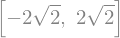

In [10]:
solve(x**2 - 8,x)

Ou simplificar expressões algébricas

In [11]:
sympy.pprint((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)) 
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

 3    2        
x  + x  - x - 1
───────────────
   2           
  x  + 2⋅x + 1 


<hr>

## Funções e gráficos
A forma mais simples de definir uma função no SymPy é simplesmente definir uma nova variável atribuindo uma expressão com variáveis simbólicas

In [12]:
expr = x**3 -5*x**2 + 3*x + 2
expr

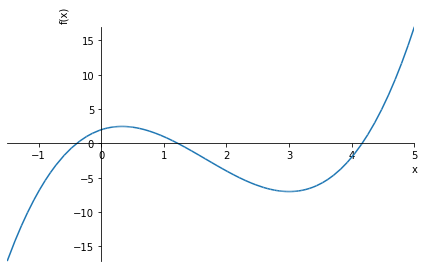

In [13]:
sympy.plot(expr,(x,-1.5,5));  # é fácil plotar o gráfico de uma função

Para mais informações veja a [documentação online](https://docs.sympy.org/latest/modules/functions/index.html?highlight=function#module-sympy.functions).


<hr>

## Matrizes
É possível definir matrizes com o comando **Matrix()**

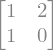

In [14]:
M = Matrix([[1,2],[1,0]])  # define M com a nossa velha conhecida matriz...
M

In [15]:
M.det()   # calcula o determinante da matriz M

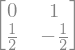

In [16]:
M.inv()   # matriz inversa

In [17]:
M.eigenvals()   # autovalores

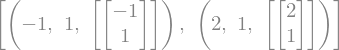

In [18]:
M.eigenvects()  # autovetores

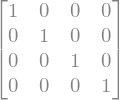

In [19]:
sympy.eye(4)  # matriz identidade de ordem 4

Podemos também definir uma matriz de variáveis e funções simbólicas! 😉

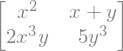

In [20]:
G = Matrix([[x**2,y+x],[2*x**3*y, 5*y**3]])
G

Para mais informações e recursos, veja a [documentação online](https://docs.sympy.org/latest/tutorial/matrices.html?highlight=matrix). Vale a pena ver a parte de **diagonalização**.

<hr>


## Cálculo
Vejamos alguns exemplos de como usar sympy em Cálculo...

**Derivadas**

In [21]:
diff(sin(x)*exp(x), x)

In [22]:
diff(exp(2*x),x,3)  # calcula a terceira derivada de exp(2*x) 

Podemos aplicar derivadas em objetos mais complexos, como matrizes, por exemplo.

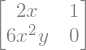

In [23]:
diff(G,x)  # a matriz G foi definida acima

Para calcular **derivadas parciais**, como $\frac{\partial^2}{\partial x \partial y} e^{(x^2+y^3)}$

In [24]:
diff(exp(x**2+y**3),x,y)  # derivadas parciais com relação a x e y

**Integração** 
- integrais indefinidas: `integrate(expr, variável)`
- integrais definidas:   `integrate(expr, (var_int, lim_inf, lim_sup))`


In [25]:
integrate(cos(x),x)

In [26]:
# integral de uma gaussiana no intervalo {0,oo}
integrate(exp(-x**2),(x,0,oo))  # O símbolo "oo" representa infinito

Há ainda outra forma de definir de a integral, que pode ser conveniente

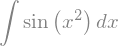

In [27]:
integral = sympy.Integral(sin(x**2),x)
integral

A variável _integral_ representa a integração indicada acima. Para realizar o cálculo, pode-se usar **.doit()**

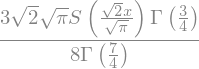

In [28]:
integral.doit()

O método **.doit()** pode ser usado em outros contextos também.

<hr>

## Séries de potências
Podemos facilmente expandir em **série de Taylor**, usando o comando **series()**

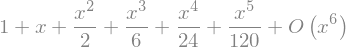

In [29]:
series(exp(x))

Se definirmos uma expressão (ou função), podemos fazer a sua expansão usando o método **.series()**. Neste caso, a sintaxe geral tem a forma: `f(x).series(x, x0, n)`, onde `x0` indica o ponto de expansão e `n` indica a ordem da expansão.

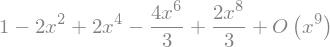

In [30]:
expr = exp(-2*x**2)
expr.series(x,0,9)

## Séries de Fourier
Também é possível expandir em **Série de Fourier**. Para isso, vamos carregar a função  

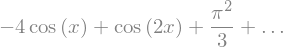

In [31]:
from sympy import fourier_series
s = fourier_series(x**2)
s

In [32]:
#sympy.init_printing(pretty_print=True,use_unicode=True)
s1 = fourier_series(x**2)
s2 = fourier_series(x**3)
sympy.pprint(s1)
sympy.pprint(s2)

                        2    
                       π     
-4⋅cos(x) + cos(2⋅x) + ── + …
                       3     
                                                ⎛           3⎞             
                        ⎛   3   3⋅π⎞            ⎜  4⋅π   2⋅π ⎟             
⎛           3⎞          ⎜- π  + ───⎟⋅sin(2⋅x)   ⎜- ─── + ────⎟⋅sin(3⋅x)    
⎝-12⋅π + 2⋅π ⎠⋅sin(x)   ⎝        2 ⎠            ⎝   9     3  ⎠             
───────────────────── + ───────────────────── + ─────────────────────── + …
          π                       π                        π               


É possível definir melhor o ponto de expansão, o intervalo e a ordem da expansão

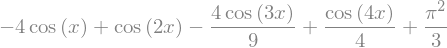

In [33]:
s = fourier_series(x**2, (x,-pi,pi))
s.truncate(5)

## Transformada de Fourier

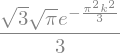

In [34]:
from sympy import fourier_transform, exp
from sympy.abc import x, k
fourier_transform(exp(-3*x**2), x, k)

Para mais detalhes e informações, consulte a [documentação online](https://docs.sympy.org/latest/modules/integrals/integrals.html?highlight=fourier#sympy.integrals.transforms._fourier_transform).

<hr>
<hr>

## Exemplos e exercícios

### Exemplo 1
Vamos resolver aqui o **Exemplo 2.6** do livro do **Griffiths**, para ilustrar alguns recursos interessantes.

Para mais aprender mais sobre **Funções Especiais** do sympy, veja a [documentação online](https://docs.sympy.org/latest/modules/functions/special.html#).


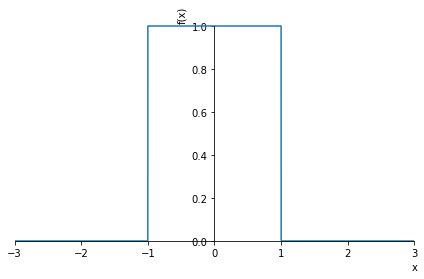

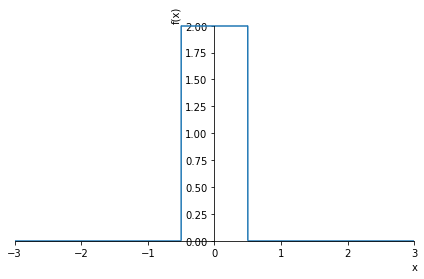

In [35]:
from sympy import Heaviside, DiracDelta, plot, symbols, oo, Eq, sqrt, pi, exp, sin
psi, A, a = symbols('psi, A, a')
h = A*(Heaviside(x+a)-Heaviside(x-a))
plot(h.subs(((a,1),(A,1))) ,(x,-3,3));
plot(h.subs(((a,0.5),(A,2))) ,(x,-3,3));

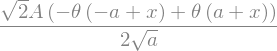

In [36]:
psi = h/sqrt(2*a)
psi
#psi1 = psi.subs(((A,1),(a,1)))
#psi1

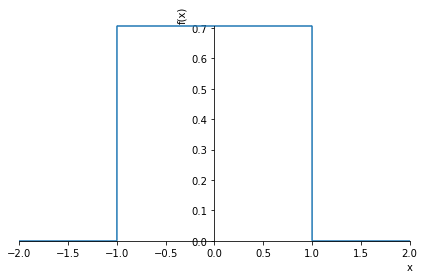

In [37]:
psi1 = psi.subs(((A,1),(a,1)))
plot(psi1,(x,-2,2));

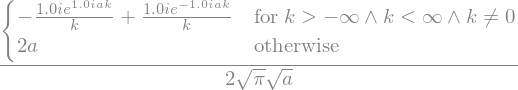

In [38]:
phi = (1/sqrt(2*pi))*(1/sqrt(2*a))*integrate(exp(-1j*k*x),(x,-a,a))
phi

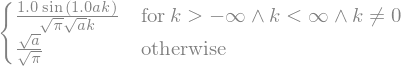

In [39]:
phi.simplify()

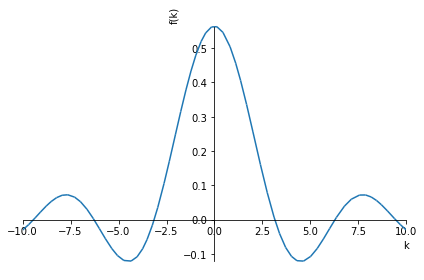

In [40]:
phi1 = phi.subs(a,1)
plot(phi1,(k,-10,10));

<hr>

### Exemplo 2

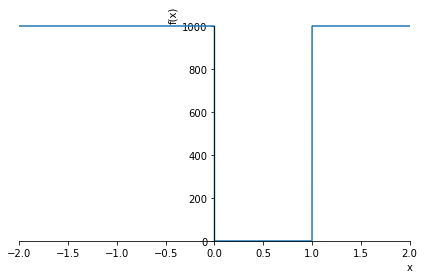

In [41]:
from sympy import Heaviside, Function, symbols, plot, simplify, exp, sin, pi
from sympy import integrate, dsolve, Eq, Derivative as D
x, k, a, A, n = symbols('x, k, a, A, n', real=True)
psi = Function('psi')(x)
V = 1000*(1-(Heaviside(x)-Heaviside(x-1)))
plot(V,(x,-2,2));

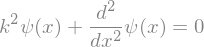

In [42]:
eq = Eq(D(psi,x,x) + k**2*psi,0)
eq

In [43]:
dsolve(eq,psi)

Ao analisar a solução acima, nos limites em que $x=0$ e $x=a$, onde $\psi \rightarrow 0$, temos que

$$
\psi(0) = C_1 \sin(0)+ C_2 \cos(0) = C_2 =0 \\
A = C_1
$$

e

$$
\psi(a) = A \sin(a k) = 0 \\
\sin(ak) = 0 \rightarrow \quad k = \frac{n\pi}{a}, \quad n=1,2,3,\dots
$$

Como pode-se verificar

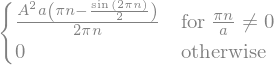

In [44]:
psi = A*sin(n*pi*x/a)
norma = integrate(psi*psi, (x,0,a)).simplify()
norma

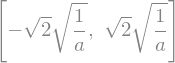

In [45]:
solve(Eq( norma.subs(n,1) ,1),A  )

Portanto, a condição de normalização resulta em $A=\sqrt{\frac{2}{a}}$, e os estados estacionários são

$$
\psi_n (x) = \sqrt{\frac{2}{a}} \text{sen}\left( \frac{n \pi}{a} x \right)
$$

Para visualizar estes estados, podemos fazer $a=1$ e plotar para $n=1,2,3$


In [46]:
psi.subs(((A,1),(a,1)))

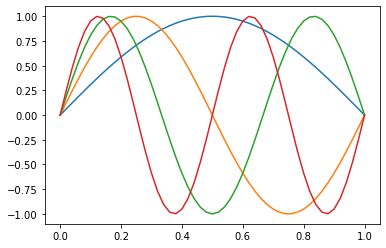

In [47]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,1,51)

for k in range(1,5):
    plt.plot( x, np.sin(k*np.pi*x) )